### Worked with Jacob Shpiece, Will Farner, Brian Andrews


# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import stats
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML import stats as astroMLstats
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Problem 2

/Users/NatashaCollova/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Freedman-Diaconis Binning')

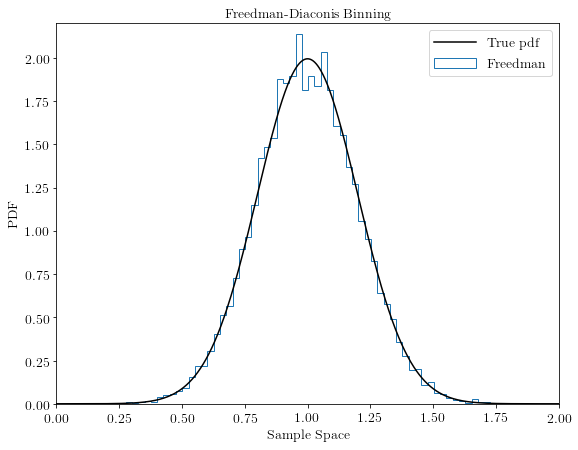

In [27]:
from astroML.plotting import hist as fancyhist
from scipy.stats import poisson
dist = stats.norm(1,0.2) # Normal distribution with mean = 1, stdev = 0.2
draws = dist.rvs(10000)

#plot histogram
plt.figure(figsize=(9,7))
fancyhist(draws, bins="freedman", histtype="step", label = 'Freedman',normed = True)

#plot true distribution
x = np.linspace(0,10,10000)
plt.plot(x,dist.pdf(x),color = 'k', label = 'True pdf')
plt.axis([0,2,0,2.2])
plt.xlabel('Sample Space')
plt.ylabel('PDF')
plt.legend(loc='best')
plt.title('Freedman-Diaconis Binning')

## Problem 3

/Users/NatashaCollova/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins in ['blocks']:
/Users/NatashaCollova/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['knuth', 'knuths']:
/Users/NatashaCollova/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['scott', 'scotts']:
/Users/NatashaCollova/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['fr

"\nI feel like my y-values are WAY too high and I'm not sure why I both hardcoded the bins for scott and used \nthe built-in freedman binning so I'm not sure what's going on! If I plot my theoretical pdf: plt.(x,cauchydist.pdf(x))\n, the values are way too small to show up on this figure which is why it looks like a straight line.\n\nRealistically, I know that Freedman Diaconis is supossed to be a better fit for distributions that are not priorly \nassumed to be Gaussian, which I think was supossed to be the point of showing this plot! Therefore, I will assume\nthat the Freedman-binned histogram would be fit better using a Cauchy-calculated distribution rather than a normal, \nGaussian distribution.\n"

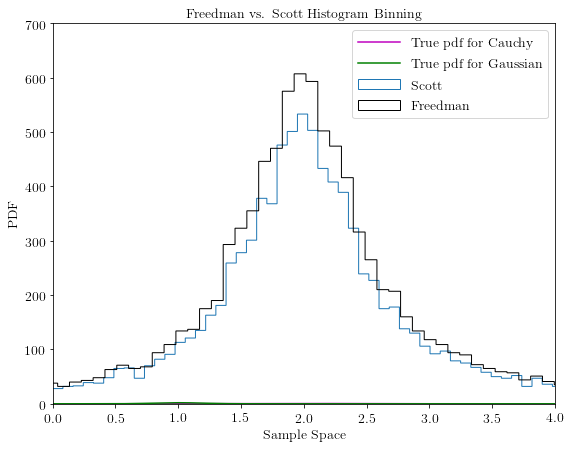

In [28]:
from astroML.plotting import hist as fancyhist

dist = stats.norm(1,0.2) # Normal distribution with mean = 1, std = 0.2
cauchydist = stats.cauchy(2,0.5)
draws=np.concatenate([stats.cauchy(2,0.5).rvs(int(10000))]) #TASH COMMENT THIS


plt.figure(figsize=(9,7))
plt.plot(x,cauchydist.pdf(x),color = 'm', label = 'True pdf for Cauchy') #Cauchy Distribution
#NOTE: I'm not sure why the above isn't fitting a pdf to my histogram (pdf values )
plt.plot(x,dist.pdf(x),color = 'g', label = 'True pdf for Gaussian')

'''
A cauchy distribution is a continuous probability distribution where mu = 2 is the center of 
the distribution and gamma = 0.5 is the scale parameter. This new defined 'draws' is 
randombly still picking 10000 points from the distribution (norm) - but in a more defined way.
'''

#Hard Coding Scott's Binning because fancyhist with bins = "scott" from astroML.plotting isn't working
binsize = 3.5*0.5/(10000**(1/3)) #scott's rule from book
bins = np.append(np.arange(start=draws.min(),stop=draws.max(),step=binsize),np.max(draws))

#PLOT
#plot scott hist
fancyhist(draws, bins=bins, histtype="step", label = 'Scott') #Scott Hist Binning 

#plot freedman hist
fancyhist(draws, bins="freedman", histtype="step", label = 'Freedman',color = 'k')


plt.axis([0,4,0,700])



plt.legend(loc = 'best')
plt.xlabel('Sample Space')
plt.ylabel('PDF')
plt.title('Freedman vs. Scott Histogram Binning')

'''
I feel like my y-values are WAY too high and I'm not sure why I both hardcoded the bins for scott and used 
the built-in freedman binning so I'm not sure what's going on! If I plot my theoretical pdf: plt.(x,cauchydist.pdf(x))
, the values are way too small to show up on this figure which is why it looks like a straight line.

Realistically, I know that Freedman Diaconis is supossed to be a better fit for distributions that are not priorly 
assumed to be Gaussian, which I think was supossed to be the point of showing this plot! Therefore, I will assume
that the Freedman-binned histogram would be fit better using a Cauchy-calculated distribution rather than a normal, 
Gaussian distribution.
'''



## Problem 4

Text(0.5,1,'Display of Central Limit Theorem for N=5')

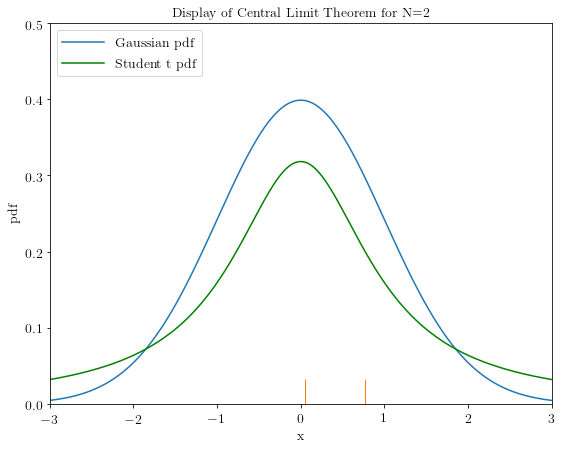

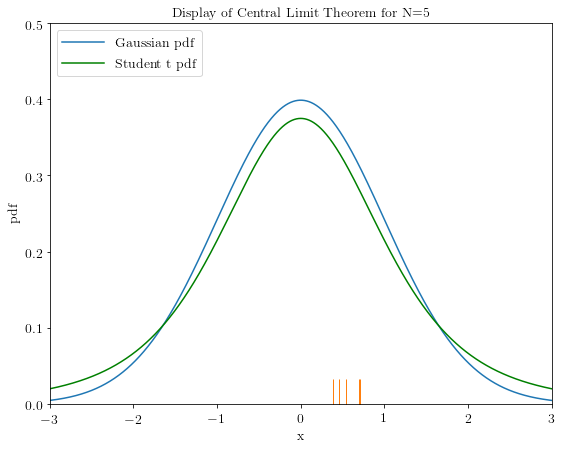

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import gamma
import math


#N=2
N1=2 # Number of draws
mu=0 # Location
sigma =1  # Scale factor
u = np.linspace(-3,3,1000000) # Array to sample the space

dist = stats.norm(mu,sigma) #Create normal distribution (Gaussian) with parameters mu and sigma

#PLOT 1 for N=2
plt.figure(figsize=(9,7))

#plot distribution of linspace
plt.plot(u,dist.pdf(u),label = 'Gaussian pdf') 

#plot random sample markers
x1 = np.random.random(N1) # Two random draws 
plt.plot(x1, 0*x1, '|', markersize=50) #Indicator of where 2 random draws are from distribution

#plot Student's t distribution (gamma function)
k1 = N1 -1 #dof
studentst1 = gamma((k1+1)/2)/(np.sqrt(k1*math.pi)*gamma(k1/2))*(1+((u*u)/k1))**(-(k1+1)/2) #prob. of u given k
plt.plot(u,studentst1,color = 'g',label='Student t pdf')

plt.legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('pdf')
plt.axis([-3,3,0,0.5])
plt.title('Display of Central Limit Theorem for N=2')

#N=5
N2=5 # Number of draws

#PLOT 2 for N=5
plt.figure(figsize=(9,7))

#plot distribution of linspace
plt.plot(u,dist.pdf(u),label = 'Gaussian pdf') # Complete

#plot random sample markers
x2 = np.random.random(N2) # Five random draws
plt.plot(x2, 0*x2, '|', markersize=50) #Indicator of where 5 random draws are from distribution

#plot Student's t distribution (gamma function) for N = 5
k2 = N2 -1 #dof
studentst2 = gamma((k2+1)/2)/(np.sqrt(k2*math.pi)*gamma(k2/2))*(1+((u*u)/k2))**(-(k2+1)/2) #prob. of u given k
plt.plot(u,studentst2,color = 'g',label='Student t pdf')


plt.xlabel('x')
plt.ylabel('pdf')
plt.axis([-3,3,0,0.5])
plt.legend(loc = 'upper left')
plt.title('Display of Central Limit Theorem for N=5')